In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
import koreanize_matplotlib
import plotly.express as px

### 대륙별 여행자들 특성을 분석하여 선호하는 여행 방식 도출
- 2022~2024년, 136명의 여행자 정보
- 분석 대상 : 숙박 비용, 숙박 타입, 교통 비용, 교통 타입, 여행 기간
- 분석 방법 : 그룹 연산을 통한 시각화 및 관계 파악
- 분석 결과를 바탕으로 대륙별 여행자들이 선호하는 여행 스타일 도출

In [20]:
# 데이터 가져와서 데이터프레임 만들기
data=pd.read_excel('travel_details_dataset.xlsx')
df=pd.DataFrame(data)
df

,Traveler continent,Destination,Start date,End date,Duration (days),Traveler name,Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost
0,N.America,London,5/1/2023,5/8/2023,7,John Smith,35,Male,USA,Hotel,1200,Flight,600
1,N.America,Thailand,6/15/2023,6/20/2023,5,Jane Doe,28,Female,Canadian,Resort,800,Flight,500
2,Asia,Bali,7/1/2023,7/8/2023,7,David Lee,45,Male,Korean,Villa,1000,Flight,700
3,Europe,USA,8/15/2023,8/29/2023,14,Sarah Johnson,29,Female,UK,Hotel,2000,Flight,1000
4,Asia,Japan,9/10/2023,9/17/2023,7,Kim Nguyen,26,Female,Vietnamese,Airbnb,700,Train,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,S.America,Brazil,8/1/2023,8/10/2023,9,Jose Perez,37,Male,Brazilian,Hostel,2500,Car,2000
132,N.America,Canada,8/15/2023,8/21/2023,6,Emma Wilson,29,Female,Canadian,Hotel,5000,Flight,3000
133,Asia,Bangkok,9/1/2023,9/8/2023,7,Ryan Chen,34,Male,Chinese,Hostel,2000,Train,1000
134,Europe,Spain,9/15/2023,9/22/2023,7,Sofia Rodriguez,25,Female,Spanish,Airbnb,6000,Flight,2500


In [22]:
# 숙소 비용 평균값 확인
%precision 0
Ac=np.array(df['Accommodation cost'])
Acv=int(np.mean(Ac))
print(Acv,type(Acv))

1253 <class 'int'>


In [23]:
# 교통 비용 평균값 확인
%precision 0
Tc=np.array(df['Transportation cost'])
Tcv=int(np.mean(Tc))
print(Tcv,type(Tcv))

645 <class 'int'>


In [24]:
# 여행 기간 평균값 확인
%precision 2
Du=np.array(df['Duration (days)'])
Duv=np.mean(Du)

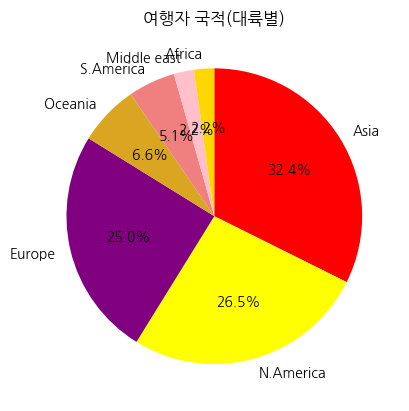

In [25]:
# 대륙별 여행자 비율 시각화 - pie 그래프
round(df['Traveler continent'].value_counts()/df['Traveler continent'].count(),2)
CountrySR=df['Traveler continent'].value_counts()
x=CountrySR.index.to_list()
h=CountrySR.values.tolist()

plt.pie(h,labels=x, autopct='%.1f%%', colors=['red','yellow','purple','goldenrod','lightcoral','pink','gold'], counterclock=False, startangle=90)
plt.title('여행자 국적(대륙별)')
plt.show()

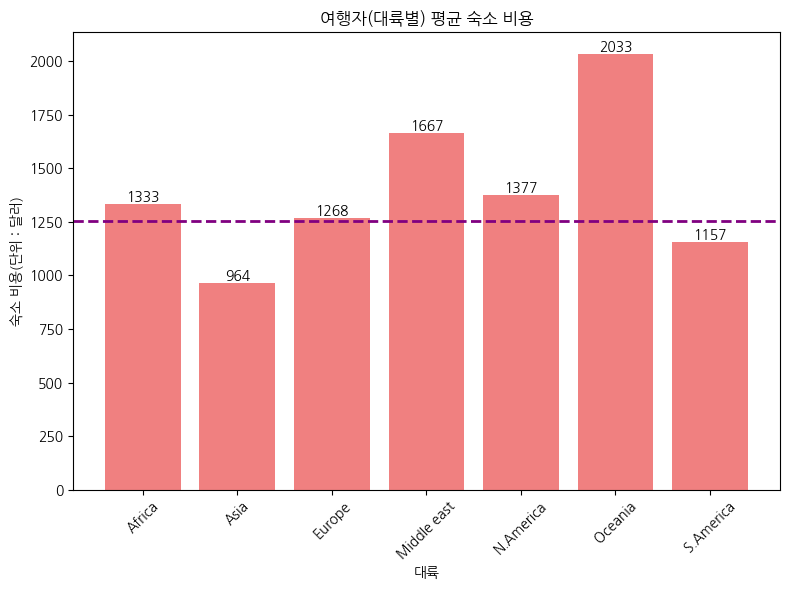

In [26]:
# 그룹 연산으로 대륙별 여행자 평균 숙소 비용 구하기
c_cost=df.groupby('Traveler continent')['Accommodation cost'].mean().reset_index()
    
plt.figure(figsize=(8,6))
bar=plt.bar(c_cost['Traveler continent'], c_cost['Accommodation cost'], color='lightcoral')
plt.axhline(Acv, color='purple', linestyle='--', linewidth=2)
plt.xlabel('대륙')
plt.ylabel('숙소 비용(단위 : 달러)')
plt.title('여행자(대륙별) 평균 숙소 비용')
plt.xticks(rotation=45)
plt.tight_layout()

# 합계 수치 표기
for b1 in bar:
    mr=b1.get_height()
    plt.text(b1.get_x()+b1.get_width()/2.0, mr, f'{mr:.0f}', ha='center', va='bottom')

plt.show()

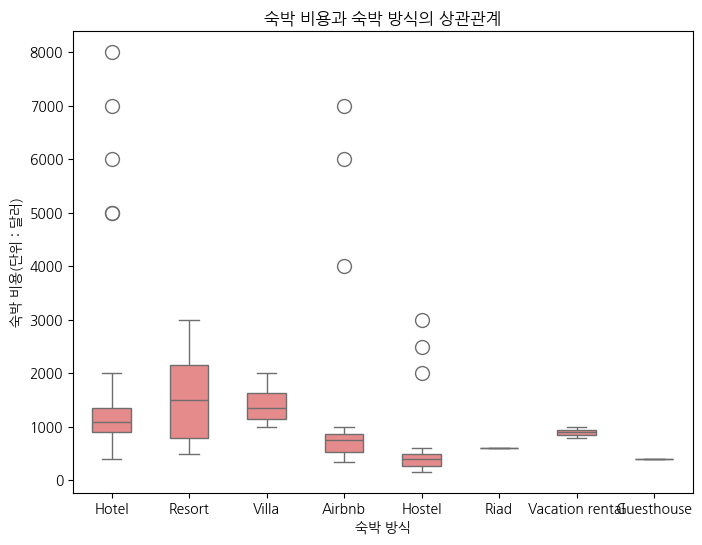

In [31]:
# 숙박 비용과 방식의 상관관계 시각화 - 박스플롯
df_accommodation = df[['Accommodation type', 'Accommodation cost']]
plt.figure(figsize=(8, 6))
sns.boxplot(x='Accommodation type', y='Accommodation cost', data=df_accommodation,
            color='lightcoral',
            width=0.5,
            fliersize=10,
            linewidth=1,
            saturation=0.8)
plt.title('숙박 비용과 숙박 방식의 상관관계')
plt.xlabel('숙박 방식')
plt.ylabel('숙박 비용(단위 : 달러)')
plt.show()

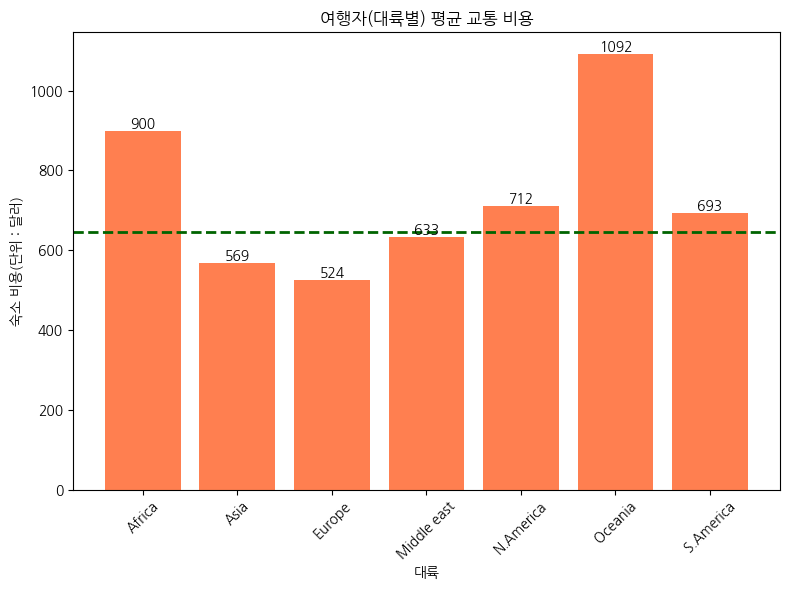

In [28]:
# 그룹 연산으로 대륙별 여행자 평균 교통 비용 구하기
c_cost=df.groupby('Traveler continent')['Transportation cost'].mean().reset_index()
    
plt.figure(figsize=(8,6))
bar=plt.bar(c_cost['Traveler continent'], c_cost['Transportation cost'], color='coral')
plt.axhline(Tcv, color='darkgreen', linestyle='--', linewidth=2)
plt.xlabel('대륙')
plt.ylabel('숙소 비용(단위 : 달러)')
plt.title('여행자(대륙별) 평균 교통 비용')
plt.xticks(rotation=45)
plt.tight_layout()

# 합계 수치 표기
for b1 in bar:
    mr=b1.get_height()
    plt.text(b1.get_x()+b1.get_width()/2.0, mr, f'{mr:.0f}', ha='center', va='bottom')

plt.show()

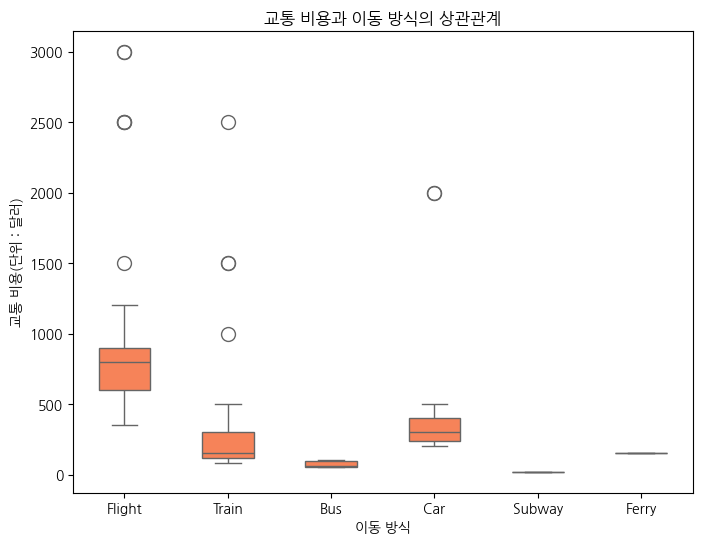

In [32]:
# 교통 비용과 이동 방식의 상관관계 시각화 - 박스플롯
df_Transportation = df[['Transportation type', 'Transportation cost']]
plt.figure(figsize=(8, 6))
sns.boxplot(x='Transportation type', y='Transportation cost', data=df_Transportation,
            color='coral',
            width=0.5,
            fliersize=10,
            linewidth=1,
            saturation=0.9)
plt.title('교통 비용과 이동 방식의 상관관계')
plt.xlabel('이동 방식')
plt.ylabel('교통 비용(단위 : 달러)')
plt.show()

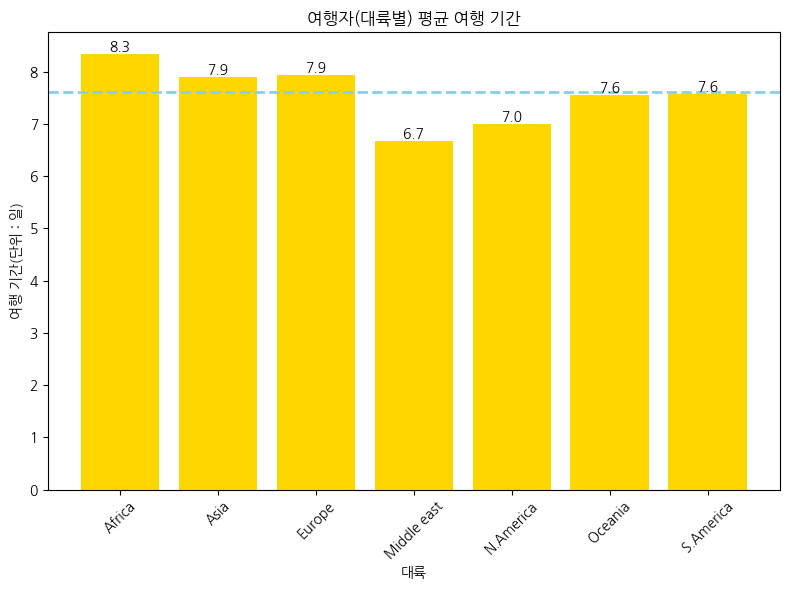

In [30]:
# 그룹 연산으로 대륙별 여행자 평균 여행 기간 구하기
c_cost=df.groupby('Traveler continent')['Duration (days)'].mean().reset_index()
    
plt.figure(figsize=(8,6))
bar=plt.bar(c_cost['Traveler continent'], c_cost['Duration (days)'], color='gold')
plt.axhline(7.6, color='skyblue', linestyle='--', linewidth=2)
plt.xlabel('대륙')
plt.ylabel('여행 기간(단위 : 일)')
plt.title('여행자(대륙별) 평균 여행 기간')
plt.xticks(rotation=45)
plt.tight_layout()

# 합계 수치 표기
for b1 in bar:
    mr=b1.get_height()
    plt.text(b1.get_x()+b1.get_width()/2.0, mr, f'{mr:.1f}', ha='center', va='bottom')

plt.show()